In [1]:
import matplotlib.pyplot as plt

plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

In [2]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()

X_iris = data.data
y_iris = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
import pandas as pd

pd.DataFrame(X_iris)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
pd.Series(y_iris)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int64

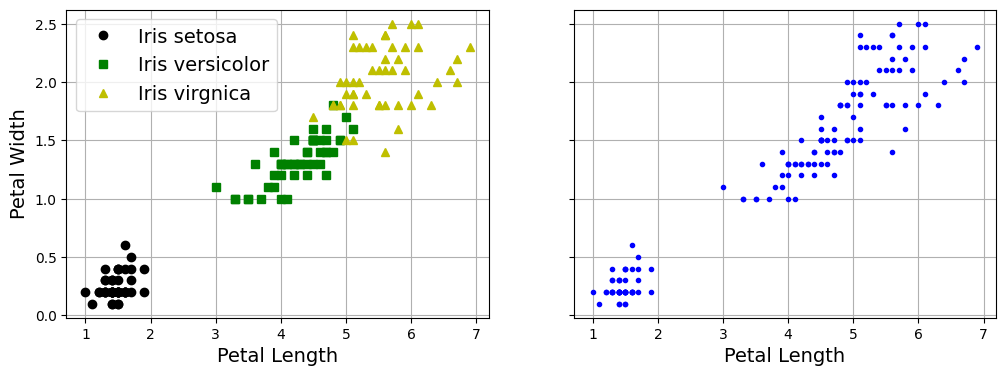

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
ax[0].plot(
    X_iris[y_iris == 0, 2],
    X_iris[y_iris == 0, 3],
    "ko",
    label="Iris setosa",
)
ax[0].plot(
    X_iris[y_iris == 1, 2],
    X_iris[y_iris == 1, 3],
    "gs",
    label="Iris versicolor",
)
ax[0].plot(
    X_iris[y_iris == 2, 2],
    X_iris[y_iris == 2, 3],
    "y^",
    label="Iris virgnica",
)
ax[0].set_xlabel("Petal Length")
ax[0].set_ylabel("Petal Width")
ax[0].grid()
ax[0].legend()

ax[1].plot(X_iris[:, 2], X_iris[:, 3], "b.")
ax[1].set_xlabel("Petal Length")
ax[1].grid()

plt.show()

# Unsupervised Learning

In [6]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

blob_center = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X_blob, y_blob = make_blobs(
    n_samples=2000, centers=blob_center, cluster_std=blob_std, random_state=42
)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X_blob)

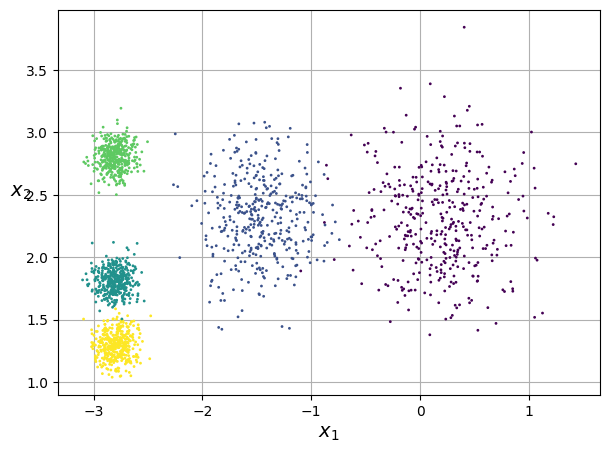

In [7]:
def clustering(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y_blob, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(7, 5))
clustering(X_blob)
plt.gca().set_axisbelow(True)
plt.grid()

In [8]:
iris = load_iris(as_frame=True)

X_iris = iris.data

k_clusters = 3
iris_kmeans = KMeans(n_clusters=k_clusters, random_state=0)
iris_cluster = iris_kmeans.fit_predict(X_iris)

X_iris['iris_cluster'] = iris_cluster
print(X_iris.head())
print(f"Centroids: ", iris_kmeans.cluster_centers_)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   iris_cluster  
0             1  
1             1  
2             1  
3             1  
4             1  
Centroids:  [[5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


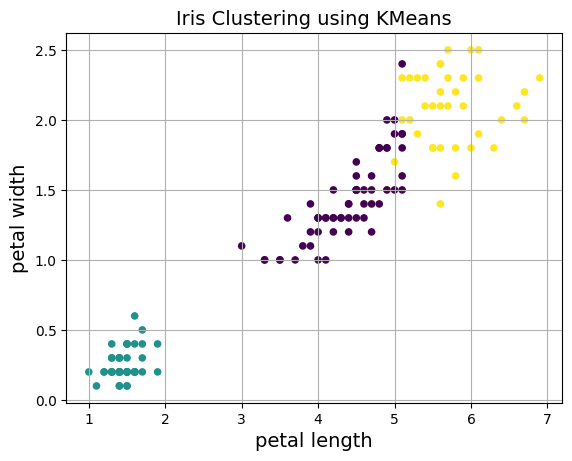

In [9]:
plt.scatter(X_iris['petal length (cm)'], X_iris['petal width (cm)'], c=iris_cluster, cmap="viridis", s=20)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.grid()
plt.title("Iris Clustering using KMeans")
plt.show()

In [10]:
y_pred

array([2, 1, 3, ..., 1, 2, 0], shape=(2000,), dtype=int32)

In [11]:
y_pred is kmeans.labels_

True

In [12]:
kmeans.cluster_centers_

array([[-2.80372723,  1.80873739],
       [ 0.20925539,  2.30351618],
       [-2.79846237,  2.80004584],
       [-1.4453407 ,  2.32051326],
       [-2.79244799,  1.2973862 ]])

In [13]:
iris_kmeans.cluster_centers_

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

In [14]:
kmeans.labels_

array([2, 1, 3, ..., 1, 2, 0], shape=(2000,), dtype=int32)

In [15]:
import numpy as np

X_new = np.array([[0,2], [3,2], [-3, 3],[-3, 2.5], [3,4]])
kmeans.predict(X_new)

array([1, 1, 2, 2, 1], dtype=int32)

C:\Users\sunod\AppData\Local\Temp\ipykernel_14604\2349850759.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(X_blob[:,0], X_blob[:,1], c='k', cmap='Pastel2', s=2, alpha=0.7)


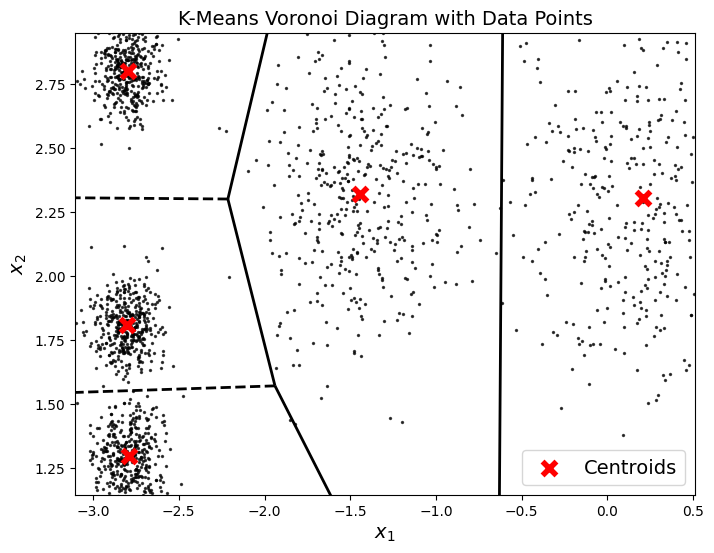

In [16]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Compute Voronoi diagram
vor = Voronoi(centroids)

# Plot Voronoi cells
fig, ax = plt.subplots(figsize=(8,6))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='k', line_width=2, point_size=0)

# Plot data points colored by cluster
scatter = ax.scatter(X_blob[:,0], X_blob[:,1], c='k', cmap='Pastel2', s=2, alpha=0.7)

# Plot centroids
ax.scatter(centroids[:,0], centroids[:,1], c='red', marker='x', s=100, linewidths=4, label='Centroids')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('K-Means Voronoi Diagram with Data Points')
ax.legend()
plt.show()


In [17]:
from sklearn.cluster import MiniBatchKMeans

mini_batch = MiniBatchKMeans(n_clusters=9, n_init=9, random_state=42)
mini_batch.fit(X_blob)

,n_clusters,9
,init,'k-means++'
,max_iter,100
,batch_size,1024
,verbose,0
,compute_labels,True
,random_state,42
,tol,0.0
,max_no_improvement,10
,init_size,None
,n_init,9


In [18]:
mini_batch.inertia_

107.33139033566033

In [19]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=True, parser='auto')

X_mnist = mnist.data
y_mnist = mnist.target

In [20]:
pd.DataFrame(X_mnist)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_mnist, y_mnist, test_size=0.3, random_state=42, stratify=y_mnist)

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train)

In [23]:
mnist_kmeans = KMeans(n_clusters=3, random_state=42)
X_resampled = mnist_kmeans.fit_predict(X_pca)

In [24]:
from sklearn.metrics import silhouette_score

# silhouette_score(X_train, mnist_kmeans.labels_)

Using GridSearch for KMeans hyperparameters to get there ideal values

In [25]:
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


class KMeansSearch(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=3, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state

    def fit(self, X, y=None):
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=self.random_state)
        self.kmeans.fit(X)
        return self

    def score(self, X, y=None):
        labels = self.kmeans.labels_
        return silhouette_score(X, labels)

def unsupervised_score(estimator, X, y=None):
    return estimator.score(X)

param_grid = {"n_clusters": range(2, 10)}

search = GridSearchCV(KMeansSearch(), param_grid, scoring=unsupervised_score, n_jobs=-1)

In [26]:
search.fit(X_train)

c:\Users\sunod\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


,estimator,KMeansSearch()
,param_grid,"{'n_clusters': range(2, 10)}"
,scoring,<function uns...00229B43E8180>
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_clusters,2


In [27]:
search.best_params_

{'n_clusters': 2}

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [29]:
pd.DataFrame(X)

,0,1
0,-0.021371,0.406186
1,0.976700,-0.458323
2,0.904059,-0.376520
3,0.377363,-0.397037
4,-0.841926,0.530587
...,...,...
995,0.798055,0.573064
996,-0.145492,0.952211
997,1.662585,-0.307919
998,-0.943559,0.327894


In [30]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

,eps,0.05
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [31]:
pd.DataFrame(dbscan.labels_[10:])

,0
0,2
1,3
2,0
3,2
4,2
...,...
985,3
986,4
987,2
988,6


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [33]:
param_grid = {
    "n_neighbors": range(2, 15),
    "weights": ["uniform", "distance"],
    "p": [1, 2],
}

In [34]:
search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

# knn = KNeighborsClassifier()

search.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': range(2, 15), 'p': [1, 2], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


In [35]:
search.best_params_

{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

In [36]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', p=2)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [37]:
y_preds = knn.predict(X_test)

In [38]:
accuracy_score(y_test, y_preds)

0.9833333333333333

In [39]:
cm = confusion_matrix(y_test, y_preds)
cm

array([[23,  0,  0],
       [ 0, 19,  0],
       [ 0,  1, 17]])

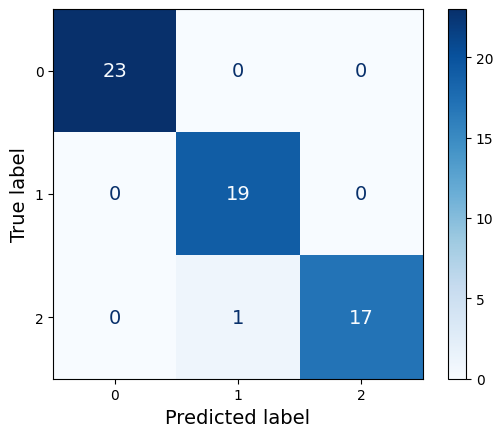

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues')

In [41]:
def plot_decision_boundary(model, X, y):
    h = 0.05
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.show()

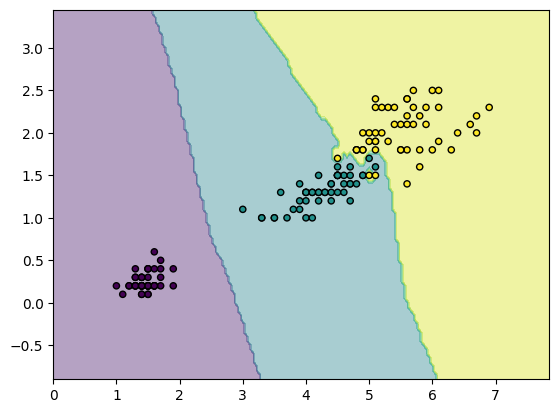

In [42]:
X_subset = X[:, [2, 3]]
knn_2d = KNeighborsClassifier(n_neighbors=3, weights="distance", p=2)
knn_2d.fit(X_subset[:-20], y[:-20])
plot_decision_boundary(knn_2d, X_subset, y)